# Part 3 - RNN and LSTM

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from torch.utils.data import DataLoader

from src import *

## Create dataloader

In [2]:
dataloader = CSVDataLoader('data/MSFT_2006-01-01_to_2018-01-01.csv')
X_train_1, X_test_1 = dataloader.split_by_year([2006, 2007], [2008])

training_dataset_1 = StockTorchDataset(X_train_1, zscore_params=None, history=5)
testing_dataset_1 = StockTorchDataset(X_train_1, zscore_params=training_dataset_1.get_zscore_params(), history=5)

training_loader_1 = DataLoader(training_dataset_1, batch_size=1, shuffle=False, drop_last=False)
testing_loader_1 = DataLoader(testing_dataset_1, batch_size=1, shuffle=False, drop_last=False)

testing

tensor([[-0.0441,  0.2843,  0.0064, -0.2462, -0.1704,  0.3096,  0.0000,  1.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000]])
tensor([0.6885])


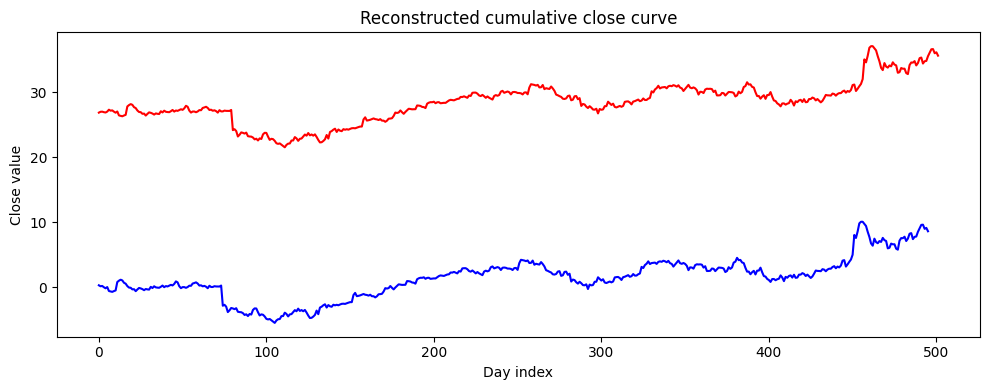

In [3]:
for sample, annotation in training_loader_1:
    print(sample)
    print(annotation)
    break

# Collect standardized targets
std_targets = []
for x, y in training_loader_1:
    std_targets.append(y.item())
std_targets = np.array(std_targets)

# Inverse z-score
inv = std_targets * training_dataset_1.get_zscore_params()[1] + training_dataset_1.get_zscore_params()[0]

# Reconstruct cumulative close curve
curve = np.cumsum(inv)

# Plot
plt.figure(figsize=(10,4))
plt.plot(curve, c="b")
plt.plot(X_train_1[:, 4], c="r")
plt.title("Reconstructed cumulative close curve")
plt.xlabel("Day index")
plt.ylabel("Close value")
plt.tight_layout()